Moon Board Model NoteBook

In [161]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image 
import math
import cv2

Important declarations and parameters

In [162]:
############################

# dataDir = '.\\RoutePics\\User\\'
dataDir = '.\\RoutePics\\Bench\\'

############################

gradeDict = [

    [0, '6A', 0],
    [1, '6A+', 0],
    [2, '6B', 0],
    [3, '6B+', 0],
    [4, '6C', 0],
    [5, '6C+', 0],
    [6, '7A', 0],
    [7, '7A+', 0],
    [8, '7B', 0],
    [9, '7B+', 0],
    [10, '7C', 0],
    [11, '7C+', 0],
    [12, '8A', 0],
    [13, '8A+', 0],
    [14, '8B', 0],
    [15, '8B+', 0],

]

Turn image data to array of [dir, climb name, grade, image data]

In [163]:
def scanFolder(directory): 

    dataSet = [[]]
    for filename in os.listdir(directory):  
        file = os.fsdecode(filename)
        if file.endswith(".png"): 

            # print(os.path.join(directory, filename))  

            grade = filename[::-1].split('.')[1]  # flip and remove extention
            grade = grade.split('_')[0]  # remove the rest of the name
            grade = grade[::-1]  # flip back

            climb = filename[::-1].split('.')[1]  # flip and remove extention

            try:
                climb = climb.split('_')[1]  # remove the rest of the name
            except: 
                climb = 'erus ton'  # remove the rest of the name

            climb = climb[::-1]  # flip back

            data = Image.open(directory + filename)
            data = np.array(data)

            dataSet.append((filename, climb, grade, data))
        else:  
            continue
            # scanFolder(os.path.join
    dataSet.pop(0)
    return dataSet

Count climbs and grades in current directory 

In [160]:
def countClimbs(set):
    count = [] #np.array(gradeDict)
    
    for k in range(len(gradeDict)):
        count.append([gradeDict[k][1], 0])

    for i in range(len(set)):
        for j in range(len(gradeDict)):
            
            # print(j)
            # print(set[i][2], count[j][0])
            
            if set[i][2] == count[j][0]:
                count[j] = [count[j][0], count[j][1] + 1]
    
    return count



Display count distribution

In [164]:
set = scanFolder(dataDir)
count = countClimbs(set)

print('total count : ', len(scanFolder(dataDir)))
for i in range(len(countClimbs(set))):
    print('grade: ', count[i][0], 'count: ', count[i][1])

total count :  465
grade:  6A count:  0
grade:  6A+ count:  0
grade:  6B count:  0
grade:  6B+ count:  66
grade:  6C count:  63
grade:  6C+ count:  54
grade:  7A count:  62
grade:  7A+ count:  70
grade:  7B count:  52
grade:  7B+ count:  24
grade:  7C count:  34
grade:  7C+ count:  26
grade:  8A count:  11
grade:  8A+ count:  2
grade:  8B count:  1
grade:  8B+ count:  0


[['6A', 0], ['6A+', 0], ['6B', 0], ['6B+', 66], ['6C', 63], ['6C+', 54], ['7A', 62], ['7A+', 70], ['7B', 52], ['7B+', 24], ['7C', 34], ['7C+', 26], ['8A', 11], ['8A+', 2], ['8B', 1], ['8B+', 0]]


<BarContainer object of 16 artists>

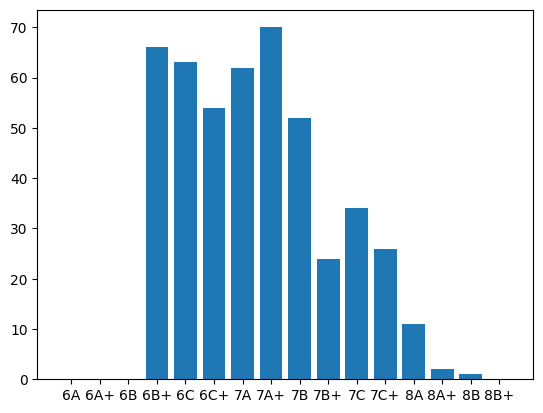

In [89]:

print(count)
plt.bar(x = [grade[0] for grade in count], height = [climb[1] for climb in count])

## Basic DNN 

Wanted parameters:

- 18 by 11 ( array of holds )
- number of holds used 
- hold distribution ( black, yellow, white )
- number of holds above/ below chest height


## Function to produce grid over image

## Eperimenting

red - (234, 49, 34, 255)
blue - (0, 0, 246, 255)
green - (114, 251, 72, 255)

dist from cntre to ring, roughly 15

# Grid and centerpoint finder function

[[29, 15], [29, 38], [29, 60], [29, 83], [29, 105], [29, 128], [29, 150], [29, 173], [29, 195], [29, 218], [29, 240], [29, 263], [29, 285], [29, 308], [29, 330], [29, 352], [29, 374], [52, 15], [52, 38], [52, 60], [52, 83], [52, 105], [52, 128], [52, 150], [52, 173], [52, 195], [52, 218], [52, 240], [52, 263], [52, 285], [52, 308], [52, 330], [52, 352], [52, 374], [74, 15], [74, 38], [74, 60], [74, 83], [74, 105], [74, 128], [74, 150], [74, 173], [74, 195], [74, 218], [74, 240], [74, 263], [74, 285], [74, 308], [74, 330], [74, 352], [74, 374], [98, 15], [98, 38], [98, 60], [98, 83], [98, 105], [98, 128], [98, 150], [98, 173], [98, 195], [98, 218], [98, 240], [98, 263], [98, 285], [98, 308], [98, 330], [98, 352], [98, 374], [120, 15], [120, 38], [120, 60], [120, 83], [120, 105], [120, 128], [120, 150], [120, 173], [120, 195], [120, 218], [120, 240], [120, 263], [120, 285], [120, 308], [120, 330], [120, 352], [120, 374], [142, 15], [142, 38], [142, 60], [142, 83], [142, 105], [142, 128],

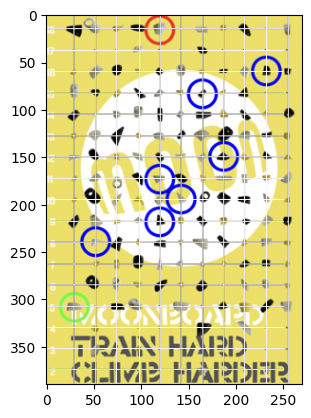

In [144]:
## CV PROCCESSING 
import cv2
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt

#grid 
# x -> start 40,, end 290,, diff 250,, div 11   -> 
# y -> start 100,, end 490,, diff 390,, div 17 (18 - 1)
# grid lines roughly 22 pixels apart

## GRID LINES AND CENTRE POINTS 
xLines = [29, 52, 74, 98, 120, 142, 165, 187, 209, 232, 255] 
yLines = [15, 38, 60, 83, 105, 128, 150, 173, 195, 218, 240, 263, 285, 308, 330, 352, 374] 

centerPoints = []

for i in range(len(xLines)):
    for j in range(len(yLines)):
        centerPoints.append([xLines[i], yLines[j]])

print(centerPoints)
#####################################


## TEST IMAGE CROP
testImage = Image.open('RoutePics\\Bench\\BALL-O-FUN_6C+.png')

box = (20, 100, 290, 490) # left, upper, right, lower

testImage = testImage.crop(box)
testImage = np.array(testImage)
##########################################

for i in range(len(xLines)):
    cv2.line(testImage, (xLines[i], 0), (xLines[i], 390), (0, 0, 0), 1)

for i in range(len(yLines)):
    cv2.line(testImage, (0, yLines[i]), (250, yLines[i]), (0, 0, 0), 1)

plt.imshow(testImage)



# colour detector function

In [61]:
import cv2
import numpy as np
import pandas as pd

index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('.\\colours.csv', names=index, header=None)

def getColourName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

# Data processing and important features for neural network 

In [178]:
# counts rings and colours in image

from PIL import Image
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

imagePath = 'ACG64_7A+.png'
ips = [imagePath, '_ BURNT OFF MEGOS_8A.png', '45 MAGNUM_7A+.png', 'AFONFE_7C.png', 'AIR FORCE_7A+.png', 'BALL-O-FUN_6C+.png']

def getRings(imagePath = imagePath):

    imageR = Image.open(imagePath).convert("RGB")

    # centerPoints = centerPoints #[[9, 15], [9, 37], [9, 60], [9, 82], [9, 105], [9, 126], [9, 150], [9, 172], [9, 195], [9, 218], [9, 240], [9, 263], [9, 284], [9, 307], [9, 330], [9, 352], [9, 374], [32, 15], [32, 37], [32, 60], [32, 82], [32, 105], [32, 126], [32, 150], [32, 172], [32, 195], [32, 218], [32, 240], [32, 263], [32, 284], [32, 307], [32, 330], [32, 352], [32, 374], [54, 15], [54, 37], [54, 60], [54, 82], [54, 105], [54, 126], [54, 150], [54, 172], [54, 195], [54, 218], [54, 240], [54, 263], [54, 284], [54, 307], [54, 330], [54, 352], [54, 374], [78, 15], [78, 37], [78, 60], [78, 82], [78, 105], [78, 126], [78, 150], [78, 172], [78, 195], [78, 218], [78, 240], [78, 263], [78, 284], [78, 307], [78, 330], [78, 352], [78, 374], [100, 15], [100, 37], [100, 60], [100, 82], [100, 105], [100, 126], [100, 150], [100, 172], [100, 195], [100, 218], [100, 240], [100, 263], [100, 284], [100, 307], [100, 330], [100, 352], [100, 374], [122, 15], [122, 37], [122, 60], [122, 82], [122, 105], [122, 126], [122, 150], [122, 172], [122, 195], [122, 218], [122, 240], [122, 263], [122, 284], [122, 307], [122, 330], [122, 352], [122, 374], [145, 15], [145, 37], [145, 60], [145, 82], [145, 105], [145, 126], [145, 150], [145, 172], [145, 195], [145, 218], [145, 240], [145, 263], [145, 284], [145, 307], [145, 330], [145, 352], [145, 374], [167, 15], [167, 37], [167, 60], [167, 82], [167, 105], [167, 126], [167, 150], [167, 172], [167, 195], [167, 218], [167, 240], [167, 263], [167, 284], [167, 307], [167, 330], [167, 352], [167, 374], [189, 15], [189, 37], [189, 60], [189, 82], [189, 105], [189, 126], [189, 150], [189, 172], [189, 195], [189, 218], [189, 240], [189, 263], [189, 284], [189, 307], [189, 330], [189, 352], [189, 374], [212, 15], [212, 37], [212, 60], [212, 82], [212, 105], [212, 126], [212, 150], [212, 172], [212, 195], [212, 218], [212, 240], [212, 263], [212, 284], [212, 307], [212, 330], [212, 352], [212, 374], [235, 15], [235, 37], [235, 60], [235, 82], [235, 105], [235, 126], [235, 150], [235, 172], [235, 195], [235, 218], [235, 240], [235, 263], [235, 284], [235, 307], [235, 330], [235, 352], [235, 374]]


    box = (20, 100, 300, 500) # left, upper, right, lower

    imageRaw = imageR.crop(box)
    ringDist = 15
    ringcount = 0
    redC = 0
    blueC = 0
    greenC = 0
    cps = []


    # graph for each climb
    graph = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        ]

    image = np.array(imageRaw)
    imageRaw = np.array(imageRaw)


    for i in range(len(centerPoints)):

        r, g, b = image[centerPoints[i][1] + ringDist, centerPoints[i][0]]
        r1, g1, b1 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1] + ringDist + 2, centerPoints[i][0]]
        r11, g11, b11 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1] + ringDist - 1, centerPoints[i][0]]
        r12, g12, b12 = int(r), int(g), int(b)

        r, g, b = image[centerPoints[i][1]- ringDist, centerPoints[i][0]]
        r2, g2, b2 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1] - ringDist + 2, centerPoints[i][0]]
        r21, g21, b21 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1] - ringDist - 1, centerPoints[i][0]]
        r22, g22, b22 = int(r), int(g), int(b)

        r, g, b = image[centerPoints[i][1], centerPoints[i][0] + ringDist]
        r3, g3, b3 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1], centerPoints[i][0] + ringDist + 2]
        r31, g31, b31 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1], centerPoints[i][0] + ringDist - 1]
        r32, g32, b32 = int(r), int(g), int(b)
        
        r, g, b = image[centerPoints[i][1], centerPoints[i][0] - ringDist]
        r4, g4, b4 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1], centerPoints[i][0] - ringDist + 2]
        r41, g41, b41 = int(r), int(g), int(b)
        r, g, b = image[centerPoints[i][1], centerPoints[i][0] - ringDist - 1]
        r42, g42, b42 = int(r), int(g), int(b)

        cv2.circle(imageRaw, (centerPoints[i][0] + ringDist, centerPoints[i][1]), 2, (0,0,0), -1)
        cv2.circle(imageRaw, (centerPoints[i][0] - ringDist, centerPoints[i][1]), 2, (0,0,0), -1)
        cv2.circle(imageRaw, (centerPoints[i][0], centerPoints[i][1] + ringDist), 2, (0,0,0), -1)
        cv2.circle(imageRaw, (centerPoints[i][0], centerPoints[i][1] - ringDist), 2, (0,0,0), -1)


        if ((getColourName(r1, g1, b1) or getColourName(r11, g11, b11) or getColourName(r12, g12, b12)) == (getColourName(r2, g2, b2) or getColourName(r21, g21, b21) or getColourName(r22, g22, b22)) == (getColourName(r3, g3, b3) or getColourName(r31, g31, b31) or getColourName(r32, g32, b32)) == (getColourName(r4, g4, b4) or getColourName(r41, g41, b41) or getColourName(r42, g42, b42)) == 'Blue'):
            ringcount += 1
            blueC += 1
            graph[i % 17][i // 17] = 2
            imageRaw = cv2.circle(imageRaw, (centerPoints[i][0], centerPoints[i][1]), 5, (0, 0, 255), -1)
            cps.append(centerPoints[i])
        
        if ((getColourName(r1, g1, b1) or getColourName(r11, g11, b11) or getColourName(r12, g12, b12)) == (getColourName(r2, g2, b2) or getColourName(r21, g21, b21) or getColourName(r22, g22, b22)) == (getColourName(r3, g3, b3) or getColourName(r31, g31, b31) or getColourName(r32, g32, b32)) == (getColourName(r4, g4, b4) or getColourName(r41, g41, b41) or getColourName(r42, g42, b42)) == 'Red'):
            ringcount += 1
            redC += 1
            graph[i % 17][i // 17] = 3
            imageRaw = cv2.circle(imageRaw, (centerPoints[i][0], centerPoints[i][1]), 5, (255, 0, 0), -1)
            cps.append(centerPoints[i])
        
        if ((getColourName(r1, g1, b1) or getColourName(r11, g11, b11) or getColourName(r12, g12, b12)) == (getColourName(r2, g2, b2) or getColourName(r21, g21, b21) or getColourName(r22, g22, b22)) == (getColourName(r3, g3, b3) or getColourName(r31, g31, b31) or getColourName(r32, g32, b32)) == (getColourName(r4, g4, b4) or getColourName(r41, g41, b41) or getColourName(r42, g42, b42)) == 'Green'):
            ringcount += 1
            greenC += 1
            graph[i % 17][i // 17] = 1
            imageRaw = cv2.circle(imageRaw, (centerPoints[i][0], centerPoints[i][1]), 5, (0, 255, 0), -1)
            cps.append(centerPoints[i])
    
    averageDist = 0

    for i in range(len(cps)-1):
        averageDist += math.hypot(cps[i][0] - cps[i+1][0], cps[i][1] - cps[i+1][1])
    
    averageDist /= len(cps)

    return(ringcount, graph, redC, blueC, greenC, averageDist) #, imageRaw)

        
        
ringcount, graph, redC, blueC, greenC, AD ,image = getRings(ips[0])

# plt.imshow(image)
print('total: ', ringcount, ' / red: ', redC, ' / blue: ', blueC, ' / green: ', greenC, '/ Avgerage Distance between holds: ', AD)
print(graph)

plt.imshow(image)



FileNotFoundError: [Errno 2] No such file or directory: 'ACG64_7A+.png'

# Final Data Prep

In [188]:
 
climbs = scanFolder(dataDir) # filename, climb, grade, data
data = []

for i in range(len(climbs)):
    x = getRings(dataDir + climbs[i][0]) # count, graph, R, B, G, AD, image
    x += (climbs[i][2], )
    data.append(x)

data = pd.DataFrame({'row1': [i[1][0] for i in data], 'row2': [i[1][1] for i in data], 'row3': [i[1][2] for i in data], 'row4': [i[1][3] for i in data], 'row5': [i[1][4] for i in data], 'row6': [i[1][5] for i in data], 'row7': [i[1][6] for i in data], 'row8': [i[1][7] for i in data], 'row9': [i[1][8] for i in data], 'row10': [i[1][9] for i in data], 'row11': [i[1][10] for i in data], 'row12': [i[1][11] for i in data], 'row13': [i[1][12] for i in data], 'row14': [i[1][13] for i in data], 'row15': [i[1][14] for i in data], 'row16': [i[1][15] for i in data], 'row17': [i[1][16] for i in data], 'count': [i[0] for i in data], 'red': [i[2] for i in data], 'blue': [i[3] for i in data], 'green': [i[4] for i in data], 'AD': [i[5] for i in data], 'grade': [i[6] for i in data]})
#data.shape()
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row1    465 non-null    object 
 1   row2    465 non-null    object 
 2   row3    465 non-null    object 
 3   row4    465 non-null    object 
 4   row5    465 non-null    object 
 5   row6    465 non-null    object 
 6   row7    465 non-null    object 
 7   row8    465 non-null    object 
 8   row9    465 non-null    object 
 9   row10   465 non-null    object 
 10  row11   465 non-null    object 
 11  row12   465 non-null    object 
 12  row13   465 non-null    object 
 13  row14   465 non-null    object 
 14  row15   465 non-null    object 
 15  row16   465 non-null    object 
 16  row17   465 non-null    object 
 17  count   465 non-null    int64  
 18  red     465 non-null    int64  
 19  blue    465 non-null    int64  
 20  green   465 non-null    int64  
 21  AD      465 non-null    float64
 22  gr

# ML test (no DNN)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as Acc, confusion_matrix as CM, classification_report as CR

attributes = data.drop(['grade', 'row1', 'row2', 'row3', 'row4', 'row5', 'row6', 'row7', 'row8', 'row9', 'row10', 'row11', 'row12', 'row13', 'row14','row15', 'row16', 'row17'], axis=1)
target = data['grade']

X_train, X_test, y_train, y_test = train_test_split(attributes, target, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(372, 5) (93, 5) (372,) (93,)


In [190]:
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier as DTC
import xgboost as xgb #Extreme Gradient Boosting
from sklearn.ensemble import RandomForestClassifier as RFC

In [196]:
modelSVC = SVC()
modelSVC.fit(X_train, y_train)

predTSVC = modelSVC.predict(X_train)
trainScoreSVC = Acc(y_train, predTSVC)

predSVC = modelSVC.predict(X_test)
scoreSVC = Acc(y_test, predSVC)

print("Accuracy (SVC): ", scoreSVC)

Accuracy (SVC):  0.16129032258064516


# functions no longer needed (but may be usefull)

[[[236 225 106 255]
  [237 224 106 255]
  [237 224 106 255]
  ...
  [236 224 106 255]
  [236 224 106 255]
  [235 223 105 255]]

 [[237 224 106 255]
  [237 224 106 255]
  [236 223 105 255]
  ...
  [236 224 106 255]
  [236 224 106 255]
  [236 224 106 255]]

 [[237 224 106 255]
  [237 224 105 255]
  [236 224 106 255]
  ...
  [236 224 106 255]
  [237 224 106 255]
  [237 224 106 255]]

 ...

 [[237 225 106 255]
  [237 225 106 255]
  [237 225 105 255]
  ...
  [220 228 102 255]
  [238 223 106 255]
  [236 224 106 255]]

 [[236 224 105 255]
  [235 223 105 255]
  [235 224 105 255]
  ...
  [238 223 106 255]
  [237 224 106 255]
  [236 224 106 255]]

 [[130 126  91 255]
  [130 126  91 255]
  [130 126  91 255]
  ...
  [237 224 106 255]
  [236 224 106 255]
  [236 224 106 255]]]


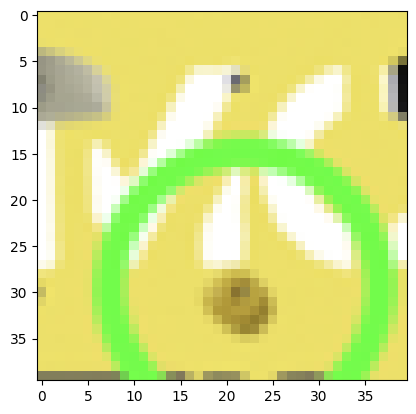

In [5]:
## DETECTING THE COLOUR RANGES OF THE R, G & B RINGS
testImage = Image.open('RoutePics\\Bench\\ACG64_7A+.png')

box = (40, 100, 290, 490) # left, upper, right, lower
testImage = testImage.crop(box)

newbox = (10, 300, 50, 340)
testImage = testImage.crop(newbox)

testImage = np.array(testImage)
print(testImage)
plt.imshow(testImage)

In [159]:
## grid function 

def draw_grid(img, grid_shape, color=(0, 255, 0), thickness=1):
    h, w, _ = img.shape
    rows, cols = grid_shape
    dy, dx = h / rows, w / cols

    # draw vertical lines
    for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
        x = int(round(x))
        cv2.line(img, (x, 0), (x, h), color=color, thickness=thickness)

    # draw horizontal lines
    for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
        y = int(round(y))
        cv2.line(img, (0, y), (w, y), color=color, thickness=thickness)

    return img